In [68]:
import pandas as pd

In [69]:
country = 'NL'
stdev = 3
fontsize=16
df = pd.read_csv(f'{country}_DA_price_v_actual_load_stdev_{stdev}.csv', index_col=0)


In [70]:
df

,hour,day,month,season,DA Price,MW Load
0,0,4,1,4,39.89,37212.0
1,1,4,1,4,33.26,34731.0
2,2,4,1,4,29.15,33076.0
3,3,4,1,4,25.63,32280.0
4,4,4,1,4,25.78,31990.0
...,...,...,...,...,...,...
61265,19,4,12,4,74.90,51371.0
61266,20,4,12,4,94.00,48371.0
61267,21,4,12,4,84.90,45490.0
61268,22,4,12,4,99.00,43853.0


In [71]:
vol = pd.read_csv(f'{country}_volatility_stdev_{stdev}.csv')['price_volatility']
vol

0         14.762539
1         15.044660
2         14.829582
3         14.732056
4         14.733663
            ...    
61142    206.496306
61143    209.929556
61144    212.615685
61145    214.536909
61146    214.139589
Name: price_volatility, Length: 61147, dtype: float64

In [72]:
print(len(vol))

61147


In [73]:
import numpy as np
import matplotlib.pyplot as plt
NL_mapeloss = pd.read_csv('FINAL_RESULTS/MAPE_loss_pytorch/NL_3stdev_50000epochs_0.005lr_0pm_0.5ps_0.5dropoutkl_2400bs_7hn_3stdev.csv')
NL_mapeloss['0']

vol_arr = np.array(vol)
nl_mape_arr = np.array(NL_mapeloss['0'])




#plt.plot(vol['price_volatility'], )

In [74]:
print(len(vol_arr[-len(nl_mape_arr):]))
print(nl_mape_arr[-3])
print(nl_mape_arr[-3:])
print(len(nl_mape_arr))

763
0.1705593779222285
[0.17055938 0.21907947 0.10536669]
763


In [75]:
#full_df = pd.DataFrame(data={'MAPE':nl_mape_arr, 
#                                  'volatility':vol[-len(nl_mape_arr):]})
full_df = pd.DataFrame()
full_df['MAPE'] = nl_mape_arr
full_df['volatility'] = vol_arr[-len(nl_mape_arr):].tolist()
#full_df

In [76]:
#full_df['volatility'] = vol[-len(nl_mape_arr):].to_list()

In [77]:
full_df

,MAPE,volatility
0,0.208345,98.371732
1,0.152315,99.047558
2,0.117217,98.117989
3,0.132964,97.866787
4,0.172894,96.783598
...,...,...
758,0.250648,206.496306
759,0.170532,209.929556
760,0.170559,212.615685
761,0.219079,214.536909


In [78]:
full_df = full_df.sort_values('volatility')
full_df

,MAPE,volatility
342,0.302176,20.110223
341,0.202476,20.777727
343,0.265896,22.627137
381,0.250168,23.302015
383,0.144031,23.472176
...,...,...
692,0.203881,331.289741
691,0.193435,331.630166
690,0.151564,331.928104
688,0.187206,332.046732


Text(0.5, 1.0, 'Bayesian NN')

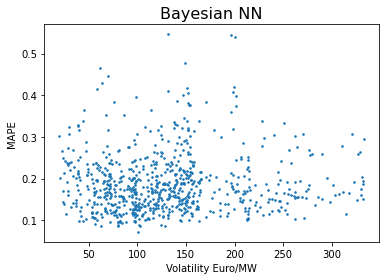

In [79]:
plt.scatter(full_df['volatility'], full_df['MAPE'], s=2.5)
plt.xlabel('Volatility Euro/MW')
plt.ylabel('MAPE')
plt.title('Bayesian NN', fontdict={'fontsize': fontsize})

In [80]:
def MAPELoss2(output, target):
    return np.mean(np.abs((target - output) / target))

In [81]:
tf_labels = pd.read_csv('FINAL_RESULTS/tensorflow_results_csv/real_{country}_{stdev}stdev_{epochs}epochs_{lr}lr_{prior_mu}pm_{prior_sigma}ps_{kl_weight}kl_{batch_size}bs_{n_hidden_layers}hn_{stdev}stdev.csv')
tf_pred = pd.read_csv('FINAL_RESULTS/tensorflow_results_csv/pred_{country}_{stdev}stdev_{epochs}epochs_{lr}lr_{prior_mu}pm_{prior_sigma}ps_{kl_weight}kl_{batch_size}bs_{n_hidden_layers}hn_{stdev}stdev.csv')

In [82]:
tf_label_arr = np.array(tf_labels['mw_load'])
tf_pred_arr = np.array(tf_pred['mw_load'])

In [83]:
print(MAPELoss2(tf_pred_arr, tf_label_arr))


0.12797181362160084


In [84]:
print(len(tf_labels))
print(len(tf_pred))

tf_label_arr = tf_label_arr[-763:]
tf_pred_arr = tf_pred_arr[-763:]

17281
17281


In [85]:
mape_losses = []
for i in range(len(tf_label_arr)):
    mape_losses.append(MAPELoss2(tf_label_arr[i], tf_pred_arr[i]))

tf_df = pd.DataFrame()
tf_df['MAPE'] = mape_losses
tf_df['volatility'] = vol_arr[-len(mape_losses):]

In [86]:
print(len(vol_arr))
print(len(mape_losses))

61147
763


Text(0.5, 1.0, 'Deep learning NN')

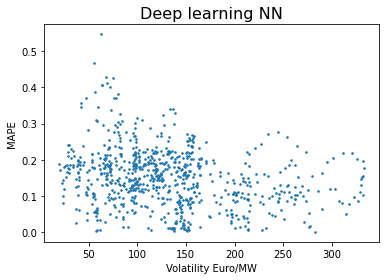

In [87]:
tf_df = tf_df[tf_df['MAPE'] < 1]

plt.scatter(tf_df['volatility'], tf_df['MAPE'], s=2.5)
plt.xlabel('Volatility Euro/MW')
plt.ylabel('MAPE')
plt.title('Deep learning NN', fontdict={'fontsize': fontsize})

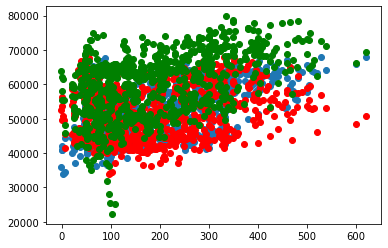

In [88]:
#tf_label_arr
#tf_pred_arr
plt.scatter(df['DA Price'][-len(tf_label_arr):], df['MW Load'][-len(tf_label_arr):])
plt.scatter(df['DA Price'][-len(tf_label_arr):], tf_label_arr, c='r')
plt.scatter(df['DA Price'][-len(tf_label_arr):], tf_pred_arr, c='g')


In [89]:
df['hour'][1]

1

In [90]:

fnn_labels = pd.read_csv('FINAL_RESULTS/FNN_reference_model_NL/labels.csv')
fnn_preds = pd.read_csv('FINAL_RESULTS/FNN_reference_model_NL/prediction.csv')
fnn_vals = pd.read_csv('FINAL_RESULTS/FNN_reference_model_NL/x_vals.csv')


In [91]:
fnn_labels_arr = np.array(fnn_labels['MW.Load'])[-763:]
fnn_preds_arr = np.array(fnn_preds['predict_class'])[-763:]
fnn_vals_arr = np.array(fnn_vals['DA.Price'])[-763:]

fnn_labels_arr1 = np.array([])
fnn_preds_arr1 = np.array([])
fnn_vals_arr1 = np.array([])
for i in range(len(fnn_labels_arr)):
    if not fnn_vals_arr[i] <= 0:
        fnn_labels_arr1 = np.append(fnn_labels_arr1, fnn_labels_arr[i])
        fnn_preds_arr1 = np.append(fnn_preds_arr1, fnn_preds_arr[i])
        fnn_vals_arr1 = np.append(fnn_vals_arr1, fnn_vals_arr[i])

In [92]:
mape_losses_fnn = []


for i in range(len(fnn_preds_arr)):
    mape_losses_fnn.append(MAPELoss2(fnn_labels_arr[i], fnn_preds_arr[i]))


In [93]:
print(len(mape_losses_fnn))

763


Text(0.5, 1.0, 'Functional NN')

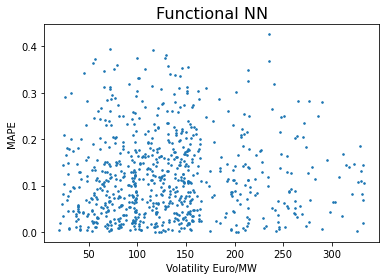

In [94]:
plt.scatter(tf_df['volatility'],mape_losses_fnn, s=2.5)
plt.xlabel('Volatility Euro/MW')
plt.ylabel('MAPE')
plt.title('Functional NN', fontdict={'fontsize': fontsize})